In [1]:
from sklearn.utils import shuffle
from random import choice, randint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class PT:
    def __init__(self,x, y):
        self.is_free = True
        self.flag = 0
        self.neighbor = []
        self.x = x
        self.y = y
pts = [[PT(j, i) for i in range(150)] for j in range(150)] 
pts_pos_neg =  shuffle( [(i,j) for i in range(150) for j in range(150)])
pts_1 = pts_pos_neg[:10000]
pts_2 = pts_pos_neg[10000:20000]
pts_free = [pts[i[0]][i[1]] for i in pts_pos_neg[20000:]]
for i in pts_1:
    pts[i[0]][i[1]].flag = 1
for i in pts_2:
    pts[i[0]][i[1]].flag = 2

In [3]:
pts[0][0].neighbor.extend([pts[0][1], pts[1][0], pts[1][1]])
pts[0][149].neighbor.extend([pts[0][148], pts[1][148], pts[1][149]])
pts[149][0].neighbor.extend([pts[148][0], pts[148][1], pts[149][1]])
pts[149][149].neighbor.extend([pts[148][148], pts[148][149], pts[149][148]])
for i in range(1, 149):
    pts[0][i].neighbor.extend([pts[1][i-1], pts[1][i], pts[1][i+1], pts[0][i-1], pts[0][i+1]])
    pts[149][i].neighbor.extend([pts[148][i-1], pts[148][i], pts[148][i+1], pts[149][i-1], pts[149][i+1]])
    pts[i][0].neighbor.extend([pts[i-1][1], pts[i][1], pts[i+1][1], pts[i-1][0], pts[i+1][0]])
    pts[i][149].neighbor.extend([pts[i-1][148], pts[i][148], pts[i+1][148], pts[i-1][149], pts[i+1][149]])
for i in range(1,149):
    for j in range(1,149):
        pts[i][j].neighbor.extend([pts[i-1][j-1],pts[i-1][j],pts[i-1][j+1],
                                  pts[i][j-1],pts[i][j+1],
                                  pts[i+1][j-1],pts[i+1][j],pts[i+1][j+1]])

In [4]:
sum([[j.flag for j in i].count(2) for i in pts])

10000

In [5]:
min_num = 5
def is_satisfied(pt, flag):
    return [k.flag for k in pt.neighbor].count(flag) >= min_num
def find_free(pt):
    for i in range(2500):
        if is_satisfied(pts_free[i], pt.flag):
            return i            
    else:
        return randint(0,2499)

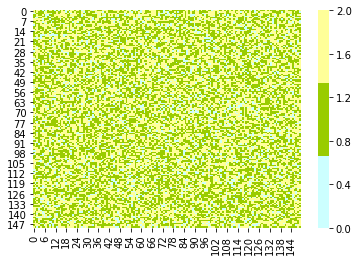

In [6]:
def get_heatmap(pts):
    m = [[i.flag for i in j] for j in pts]
    sns.heatmap(m, cmap=[(0.8,1,1),(0.6,0.8,0),(1,1,0.6)])
    plt.show()
get_heatmap(pts)

In [7]:
len(pts_free)

2500

0


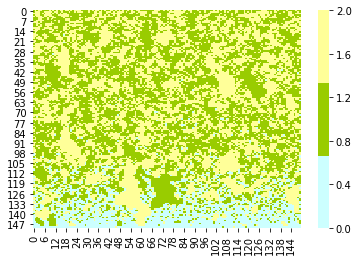

1


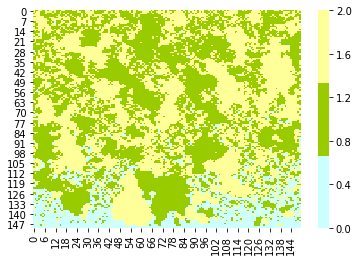

2


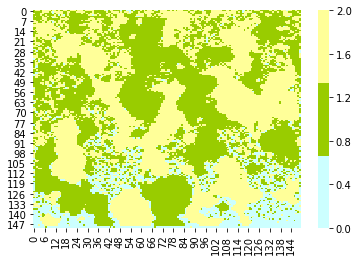

3


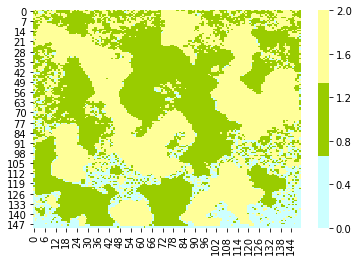

4


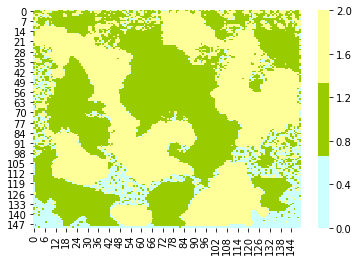

5


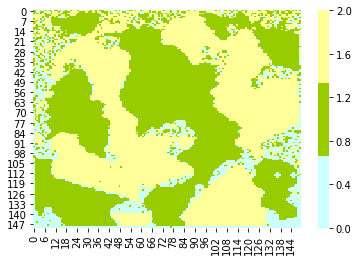

6


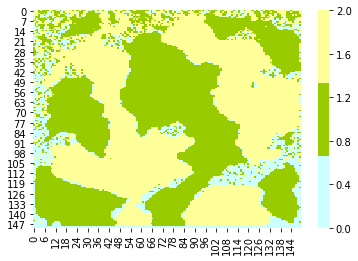

7


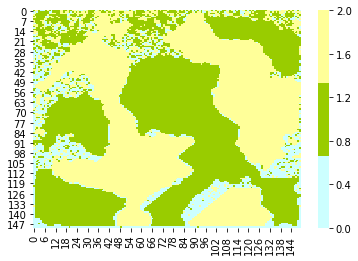

8


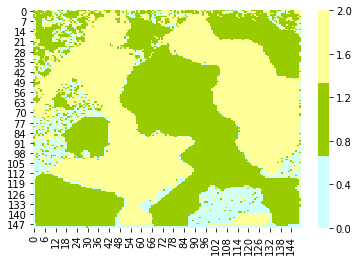

9


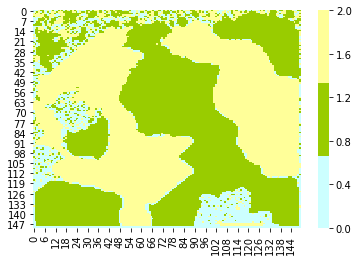

10


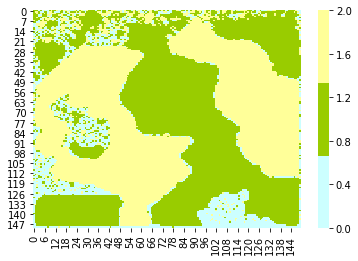

11


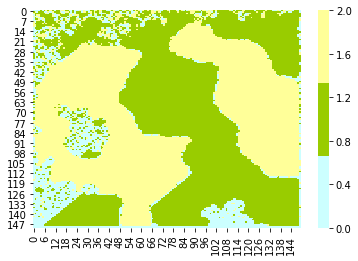

12


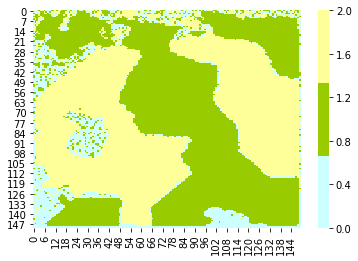

13


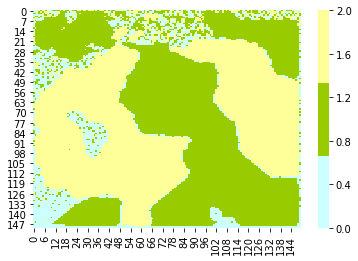

14


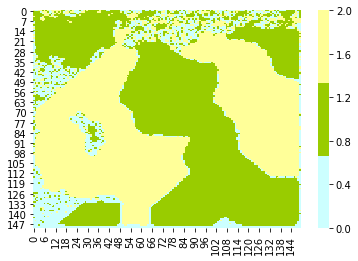

15


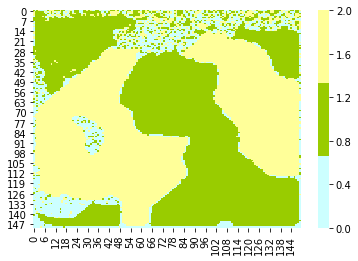

16


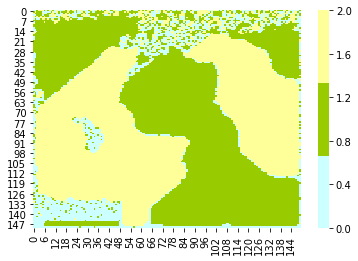

17


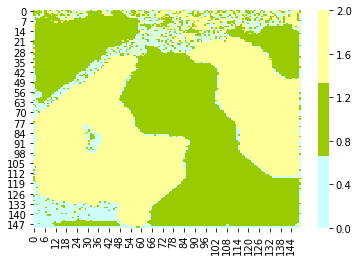

18


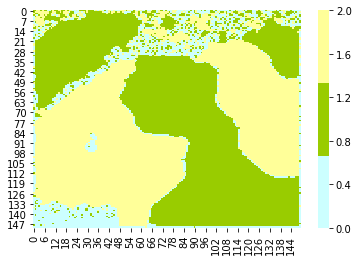

19


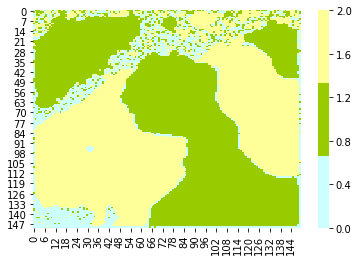

In [8]:
for batch_id in range(20):
    print(batch_id)
    for i in range(150):
        for j in range(150):
            if pts[i][j].flag == 0:
                continue
            if is_satisfied(pts[i][j], pts[i][j].flag):
                continue
            pts_free = shuffle(pts_free)
            free_id = find_free(pts[i][j])
            pts[pts_free[free_id].x][pts_free[free_id].y].flag = pts[i][j].flag
            pts[i][j].flag = 0
            pts_free.pop(free_id)
            pts_free.append(pts[i][j])

    get_heatmap(pts)

In [9]:
sum([[j.flag for j in i].count(2) for i in pts])

10000